<a href="https://colab.research.google.com/github/shaifali1102/unsupervised-learning/blob/main/tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-SNE

- t- distributed stochastic neighborhood embedding
- preserves pairwise distance in a neighborhood when we project data from high dim to low dim.
- **Crowding Problem**
  - moderate distances in high dim can become too large in 2D, forcing clusters to overlap
  - solution is to use probability distribution instead of distance
    - instead of using distance to see if a datapoint is in the neighborhood, we use probability of the datapoint being in the neighborhood
    - Gaussian distribution for high dim data ($P_{ij}$)
    - Student's t-distribution for lower dim data ($Q_{ij}$)
  - **Normalizing $P_{ij}$**
    - since sum of all probablities does not equal 1, we normalize them with sum of all probabilities    
  - **Scaling wrt cluster spread**
    - clusters having different variances needs to be scaled
    - we divide probability with $\sigma^2$ to scale wrt cluster spread
  - **Gaussian distribution for higher dim**
    $$
    P_{ij} = \frac{e^\frac{-||x_i-x_j||^2}{2\sigma_i^2}}{\sum_{k \ne i}e^\frac{-||x_i-x_k||^2}{2\sigma_i^2}}
    $$
    - where $P_{ij}$ is probability of $x_i$ and $x_j$ being neighbors in high dim
  - **Student's t-distribution for lower dim**
    - has DOF as hyperparam
    - fatter-tail distribution
    - DOF = 1 → Cauchy distribution
    - DOF = 30 → Normal distribution
    - as DOF increases, t-dist get more rigid
    $$
    Q_{ij} = \frac{(1 + ||y_i-y_j||^2)^{-1}}{\sum_{k \ne i}(1 + ||y_i-y_k||^2)^{-1}}
    $$
    - where $Q_{ij}$ is probability of $y_i$ and $y_j$ being neighbors in lower dim ($y_i$ and $y_j$ are the embeddings of $x_i$ and $x_j$ in lower dim)
  - **Why Cauchy distribution for lower dim?**
    - heavy tails assign higher probabilities to the pair of points that are far apart in lower dim
    - this solves the crowding problem in lower dim
    - separates clusters and prevents them from collapsing into a single cluster
    - Why not gaussian?
      - gaussian will lead to overcrowding and poor viz in lower dim
      - it is thin tailed and peak is also thin
  - **KL Divergence**
    - we want prob of points in higher dim to be similar to that of lower dim
    $$
    P_{ij} ∼ Q_{ij}
    $$
    - here, $P_{ij}$ is gaussian and $Q_{ij}$ is t-distribution, both are different distributions
    - we use KL divergence to determine how different are the two distributions
    $$
    KL_{Div} (P,Q) = \sum_i^n \sum_j^n P_{ij} \cdot log(\frac{P_{ij}}{Q_{ij}})
    $$
    - if $x_j$ is far from $x_i$
      - $P_{ij} \sim 0$ (thin tailed gaussian)
      - hence $KL_{Div} \sim 0$
    - if $x_j$ is very close to $x_i$
      - $P_{ij} > Q_{ij}$ (taller peak of gaussian)
      - $\frac{P_{ij}}{Q_{ij}} > 1$
      - $log(\frac{P_{ij}}{Q_{ij}}) > log(1)$
      - hence $KL_{Div} > 0$
    - Gaussian descent can be used to optimize t-SNE so that $KL_{Div}$ loss is minimum
  - **Hyperparameters**
    - n_components: new dimension(default=2)
    - perplexity: nearest neighbours to preserve the structure(default=30)
      - smaller perplexity value preserves local structure
      - larger value preserves global structure
  - **Limitations**
    - computationally expensive:
      - large computation time for large datasets
      - good for viz not for dimensionality reduction
    - hyperparam tuning is challenging
      - multiple perplexity values to be checked and model needs to be tuned on best value


## Digits Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


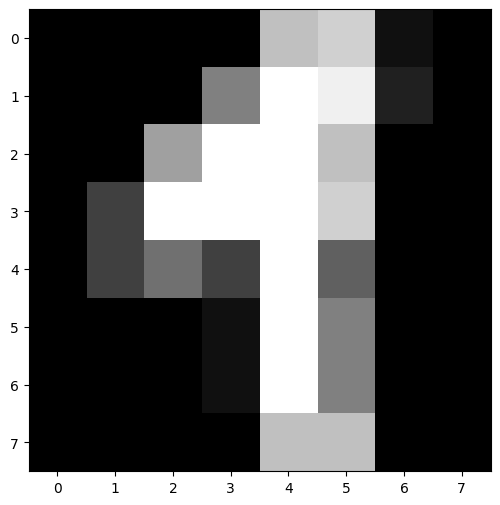

In [4]:
plt.figure(figsize=(6,6))

grid_data = X[56].reshape(8,8) #reshape from 1D to 2D pixel array for viz
plt.imshow(grid_data, cmap='gray')
plt.show()

In [5]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(1797, 64)

## Implementing t-SNE

In [6]:
from sklearn.manifold import TSNE

X_emb = TSNE(n_components=2).fit_transform(X_scaled)

X_emb.shape

(1797, 2)

- dim was reduced from 64 to 2

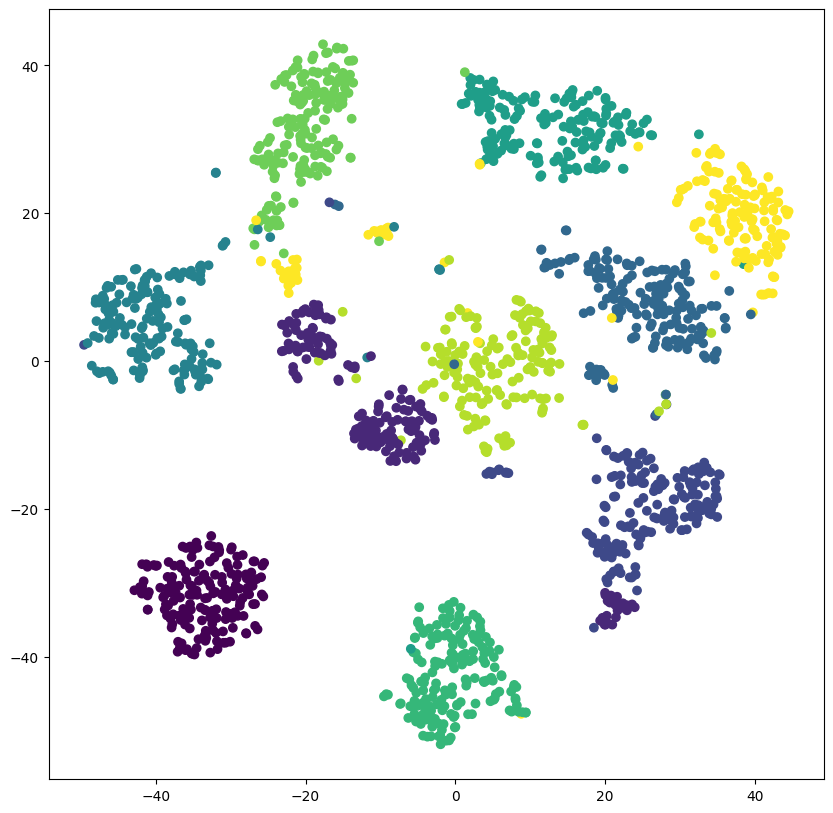

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X_emb[:,0], X_emb[:,1], c=digits.target)
plt.show()

- much better visualization from PCA
- preserves local structure much better than PCA